<a href="https://colab.research.google.com/github/shekhar-banerjee96/deep_learning_training/blob/main/CNN_Padding_Stride_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST digits classification dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# Case 1 : Without padding

In [ ]:
# Building CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation="relu", input_shape=(28,28,1)))
# please note, padding = "valid" means there is no padding applied
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu'))

model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2002698 (7.64 MB)
Trainable params: 200269

In [ ]:
# Case 2 - With padding
# Building CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation="relu", input_shape=(28,28,1)))
# please note, padding = "same" means there is padding applied
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'))

model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3231498 (12.33 MB)
Trainable params: 323

In [ ]:
# Case 3 - use stride and padding togehter

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=(2,2), activation="relu", input_shape=(28,28,1)))
# please note, padding = "same" means there is padding applied
model.add(Conv2D(32,kernel_size=(3,3), padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same', strides=(2,2),activation='relu'))

model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 85770 (335.04 KB)
Trainable params: 8577

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 4ms/step - loss: 0.2258 - accuracy: 0.9367 - val_loss: 0.0884 - val_accuracy: 0.9721
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0782 - accuracy: 0.9768 - val_loss: 0.0732 - val_accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 0.0597 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0678 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0504 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0572 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0602 - val_accuracy: 0.9837
Ep

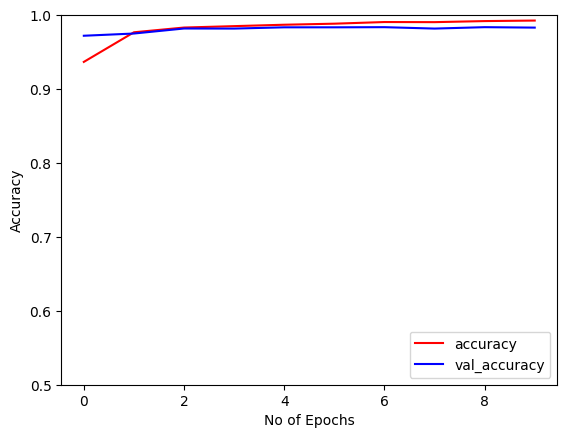

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label ='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')
plt.show()

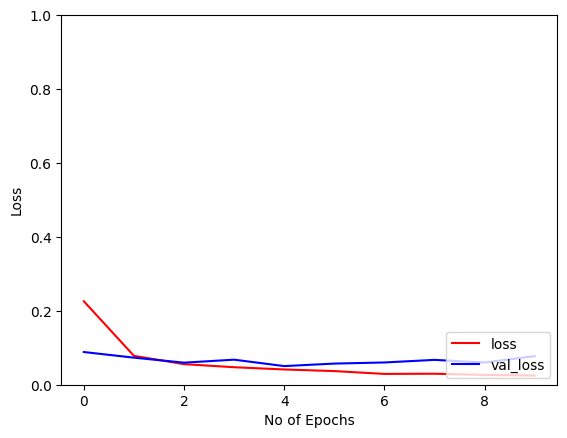

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label ='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.layers import MaxPooling2D

In [ ]:
# Case 4 - apply Max-Pooling Layer as well
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same',strides=(2,2), activation="relu", input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same',strides=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3), padding='same', strides=(2,2),activation='relu'))


model.add(Flatten()) # converting 2D to 1D so that we can build DNN model

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 32)          9248      
                                                                 
 flatten_3 (Flatten)         (None, 32)               

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 10s 4ms/step - loss: 0.3117 - accuracy: 0.9057 - val_loss: 0.1262 - val_accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1106 - accuracy: 0.9659 - val_loss: 0.1060 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0897 - accuracy: 0.9730 - val_loss: 0.0861 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9764 - val_loss: 0.0769 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0678 - accuracy: 0.9788 - val_loss: 0.0684 - val_accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0777 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0579 - accuracy: 0.9823 - val_loss: 0.0757 - val_accuracy: 0.9784
Ep

# CIFAR10 small images classification dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0

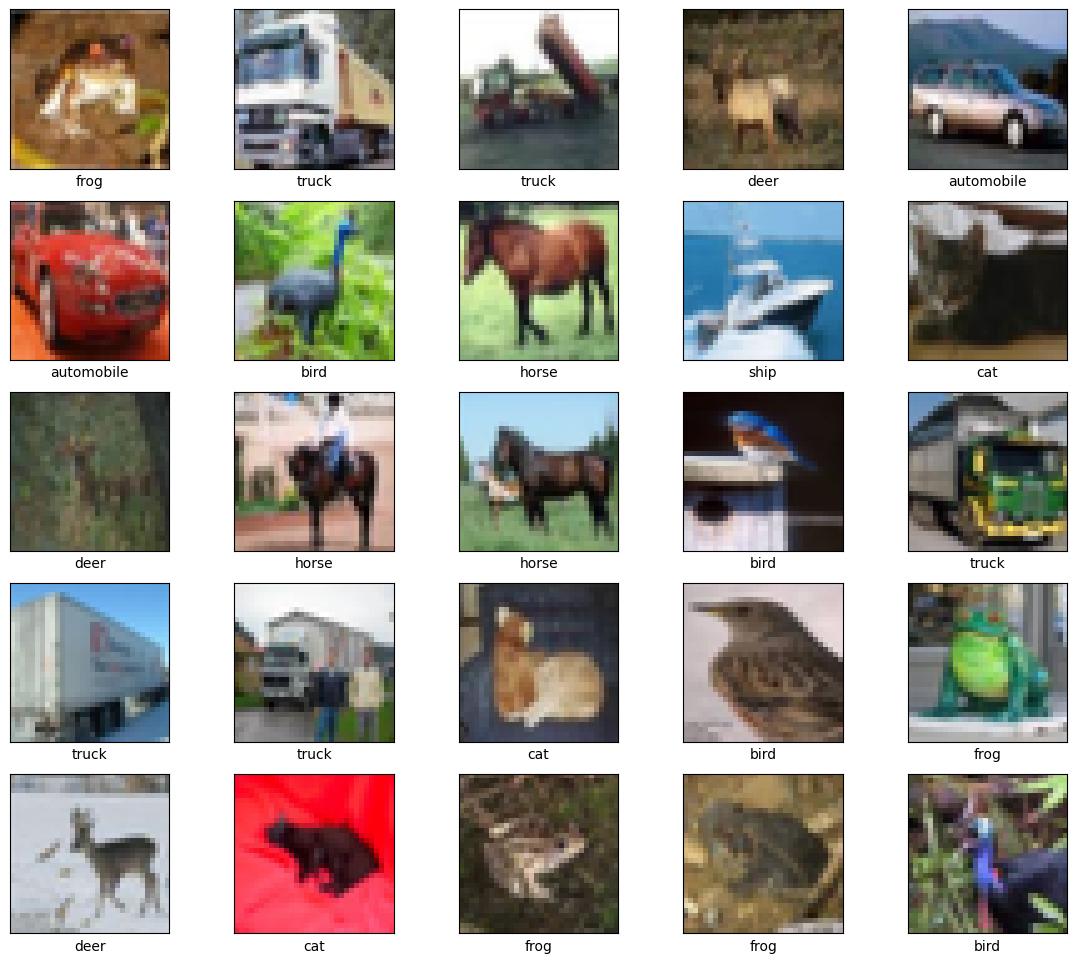

In [ ]:
Class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(14,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(Class_names[y_train[i][0]])
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', strides=1, activation='relu', input_shape=(32,32,3)))
# Channel = 1 means grayscale and 3 means RGB (red green blue)
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid',strides=1))
#model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='valid',strides=1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3940 - accuracy: 0.5006 - val_loss: 1.1826 - val_accuracy: 0.5835
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0453 - accuracy: 0.6320 - val_loss: 1.0442 - val_accuracy: 0.6271
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8690 - accuracy: 0.6967 - val_loss: 0.9354 - val_accuracy: 0.6720
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7275 - accuracy: 0.7460 - val_loss: 0.9901 - val_accuracy: 0.6665
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5858 - accuracy: 0.7945 - val_loss: 1.0879 - val_accuracy: 0.6487
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4556 - accuracy: 0.8395 - val_loss: 1.0974 - val_accuracy: 0.6630
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3385 - accuracy: 0.8815 - val_loss: 1.3290 - val_accura